## Phishing Detection
### Team Name: Pacman Bytes
### Team Members:
- Addepalli Srilekha
- Sri Lahari Sivanvitha Nori
- Jaya Ganesh Kumar Gudipati

#### Importing required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report

#### Reading data

In [2]:
train = pd.read_csv('Phising_Training_Dataset/Phising_Training_Dataset.csv')
test = pd.read_csv('Phising_Testing_Dataset/Phising_Testing_Dataset.csv')

In [3]:
print("Training data size:", train.shape)
print("Testing data size:",test.shape)

Training data size: (8955, 32)
Testing data size: (2100, 31)


In [4]:
train.head()

,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,12344,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,12345,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,12346,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,12347,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,12348,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [5]:
test.head()

,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,21338,1,1,1,1,1,1,-1,1,-1,...,1,1,1,1,1,1,1,-1,0,1
1,21339,1,-1,1,1,1,-1,0,-1,1,...,1,1,1,-1,-1,0,-1,-1,0,1
2,21340,1,-1,1,1,1,-1,0,0,-1,...,-1,-1,-1,1,-1,1,-1,1,1,-1
3,21341,-1,-1,-1,1,-1,-1,-1,-1,1,...,1,-1,-1,1,-1,1,-1,1,1,-1
4,21342,1,-1,1,1,1,-1,1,1,-1,...,1,1,1,1,1,1,-1,1,0,1


In [6]:
train_x = train.drop(['Result','key'], axis=1)

In [7]:
train_y=train['Result']

#### Visualization

In [8]:
# column names in the training dataset
features = train_x.columns

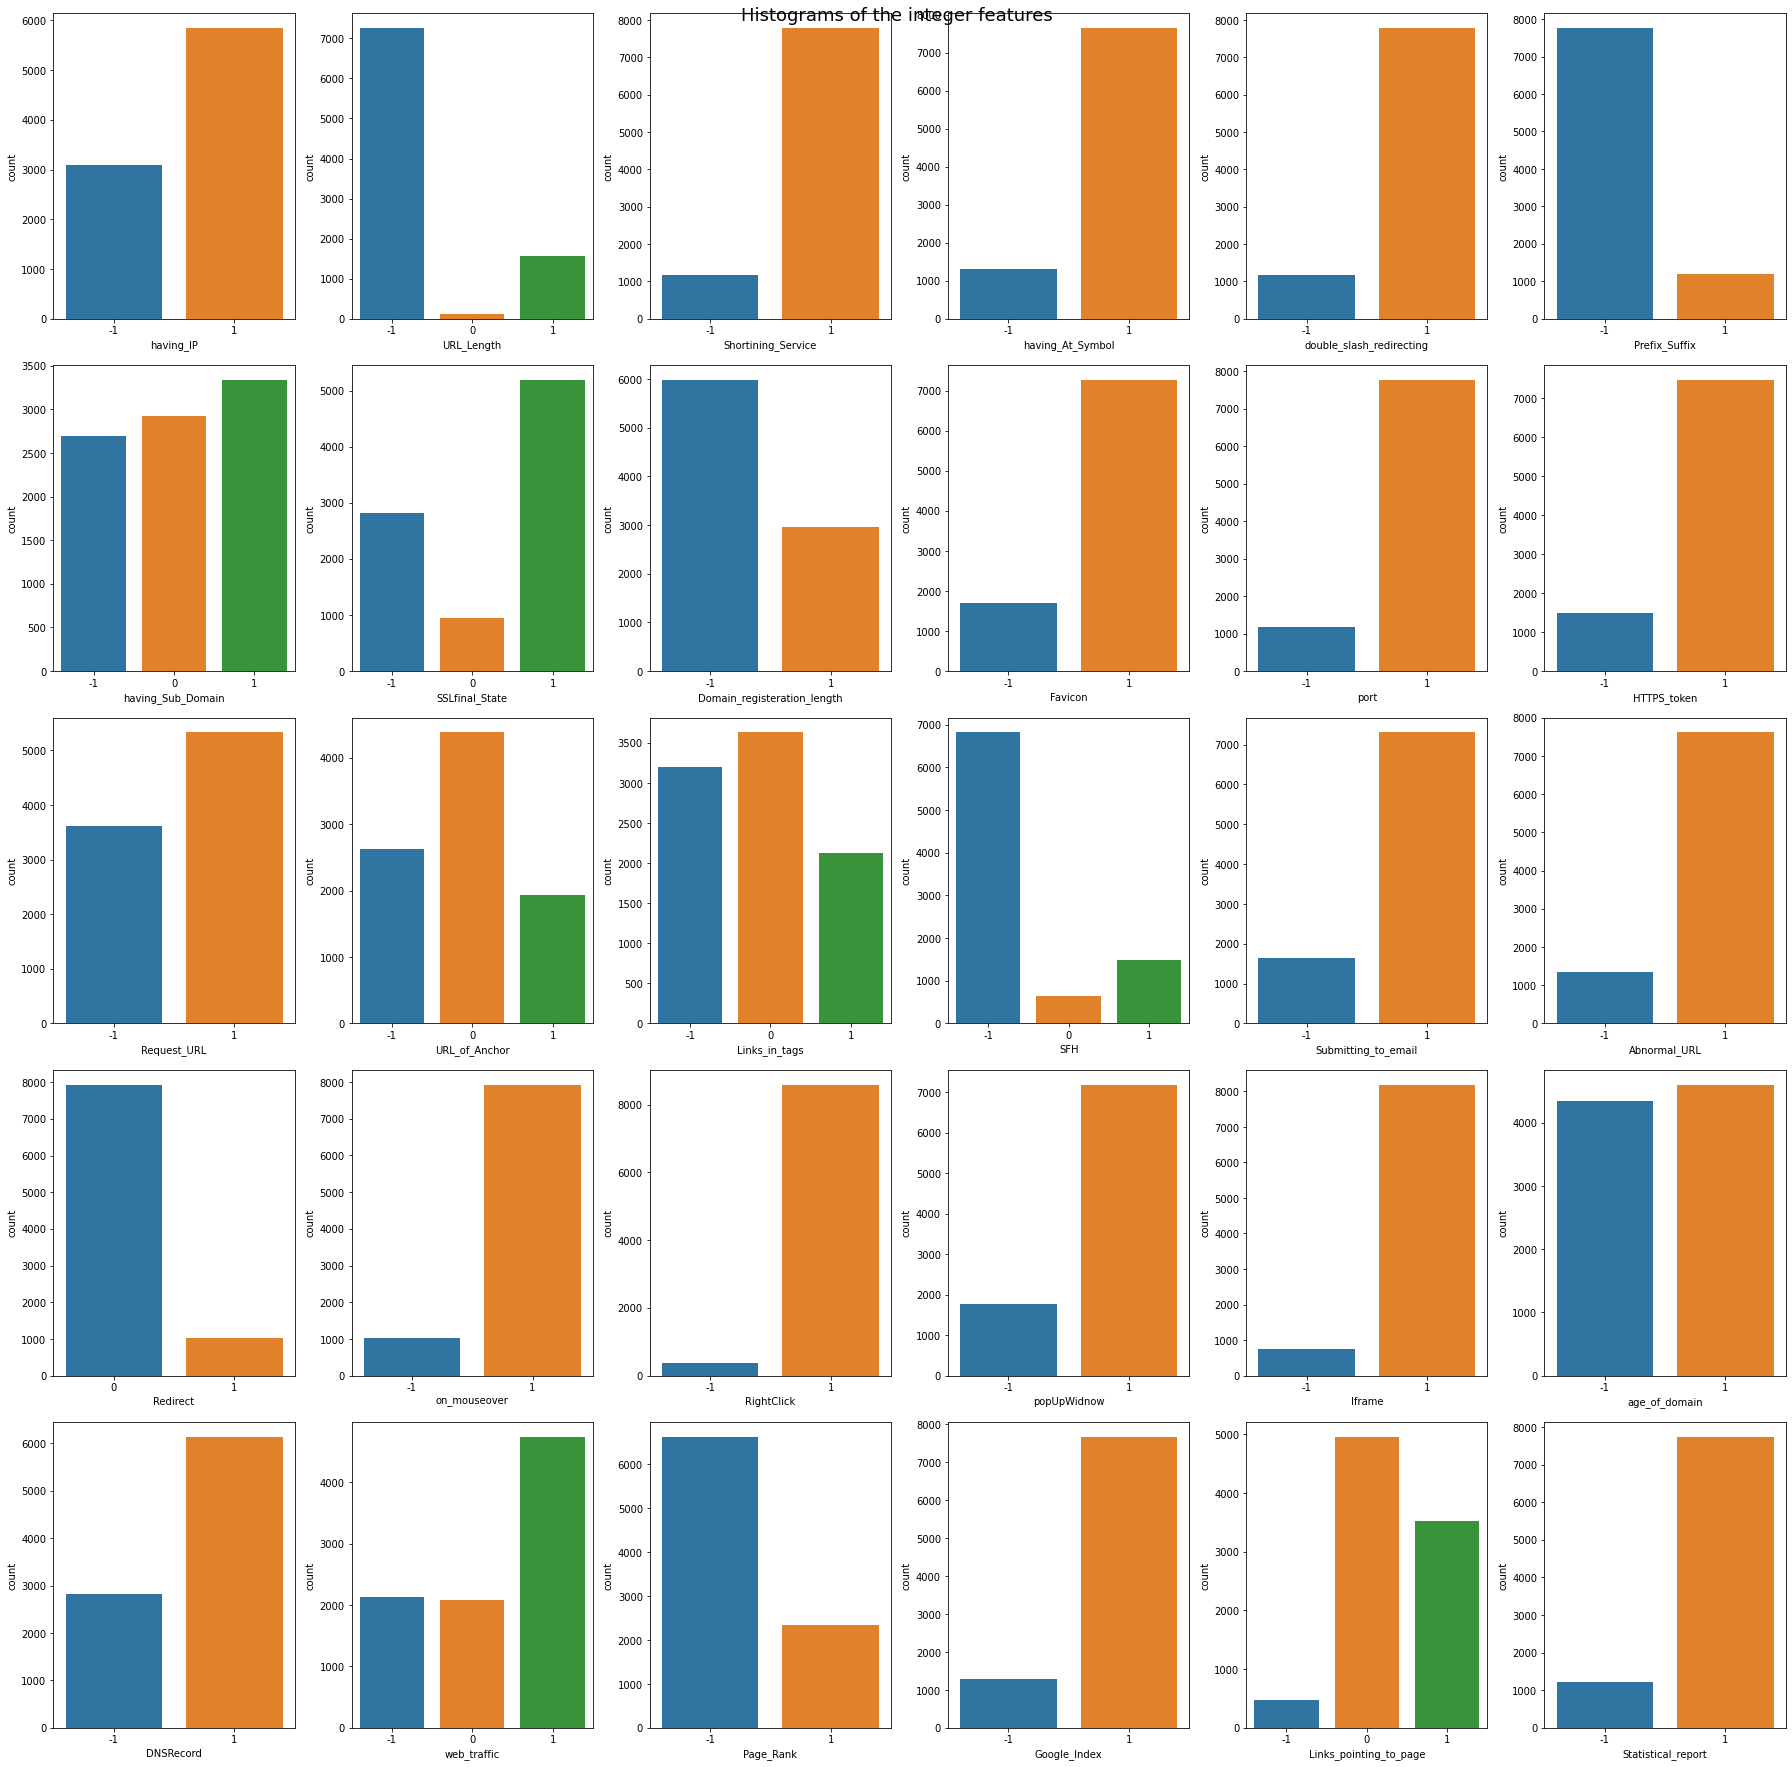

In [9]:
# drawing count plot
plt.figure(figsize=(25, 25))
for i, f in enumerate(features):
    plt.subplot(5, 6, i+1)
    axs = sns.countplot(x = train_x[f])
plt.suptitle('Histograms of the integer features',fontsize = 18)
plt.tight_layout()
plt.show()

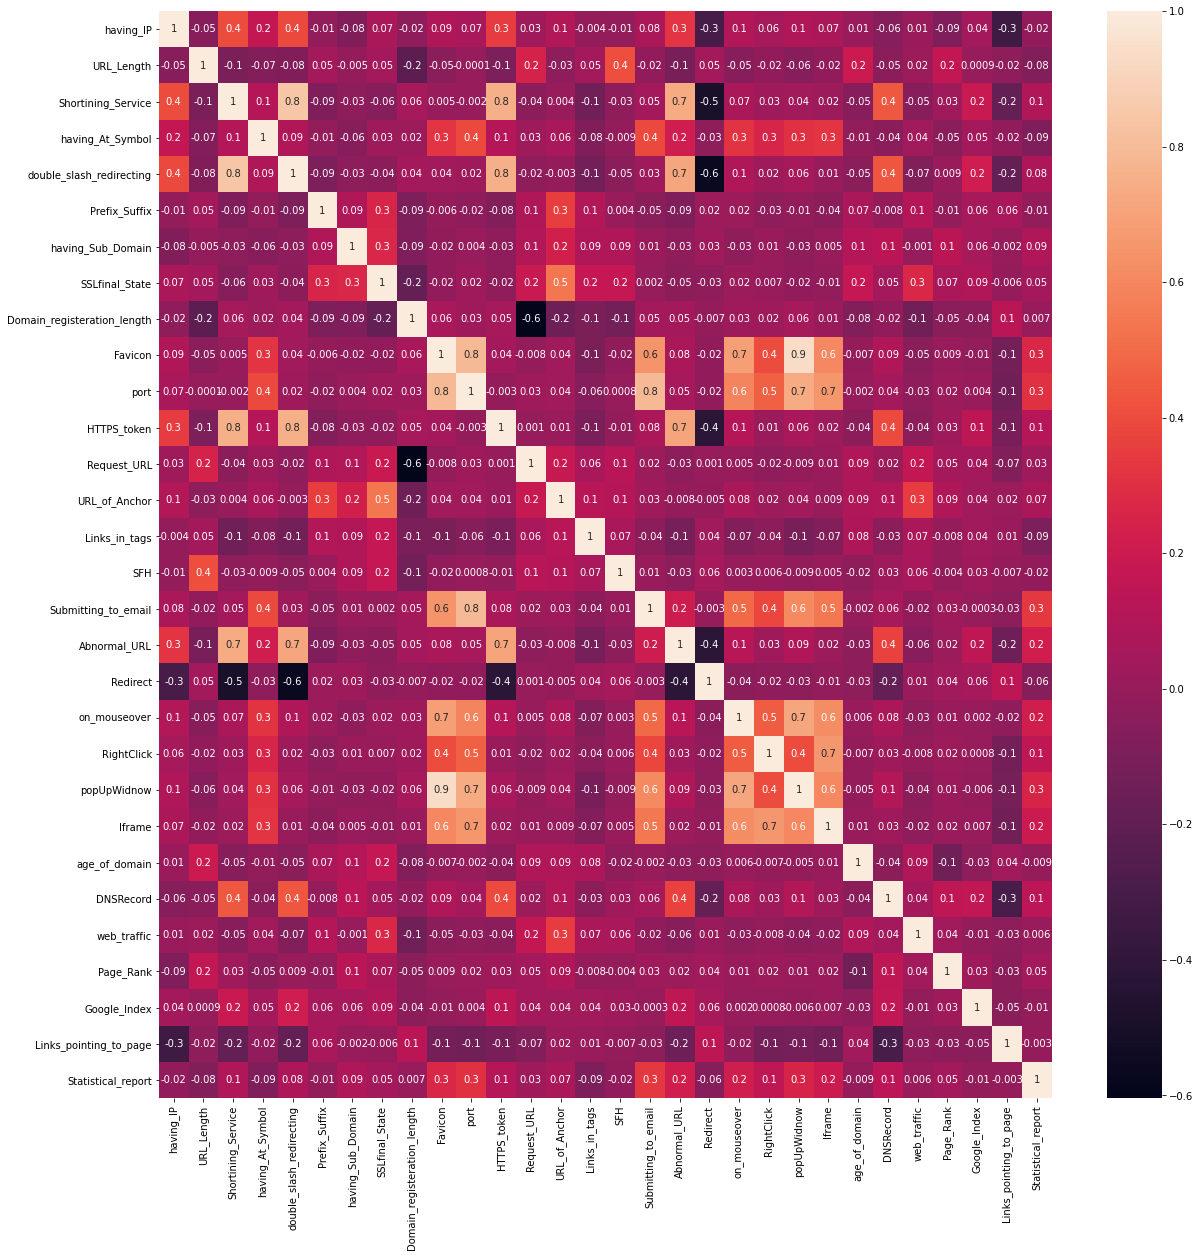

In [10]:
# heatmap i.e. correlation of features
plt.figure(figsize=(20, 20))
sns.heatmap(train_x.corr(),annot=True,fmt='.1g')
plt.show()

#### Training model

In [11]:
# splitting the data into training and validating
x_train,x_valid,y_train,y_valid = train_test_split(train_x,train_y,test_size=0.3,random_state=42,shuffle=True)

In [12]:
# initializing the model
xgb = XGBClassifier(eval_metric='logloss')

In [13]:
# fitting the training data into model
xgb.fit(x_train,y_train)

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [14]:
# predicting the validation data to check the accuracy
preds = xgb.predict(x_valid)

In [15]:
# accuracy of the model
acc = accuracy_score(y_valid,preds)
acc

0.9687383699292892

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


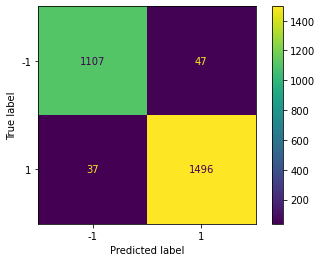

In [16]:
# visualizing the confusion matrix on the validation data
plot_confusion_matrix(xgb,x_valid,y_valid)

In [17]:
# classification report on the validation data
print(classification_report(y_valid,preds))

              precision    recall  f1-score   support

          -1       0.97      0.96      0.96      1154
           1       0.97      0.98      0.97      1533

    accuracy                           0.97      2687
   macro avg       0.97      0.97      0.97      2687
weighted avg       0.97      0.97      0.97      2687



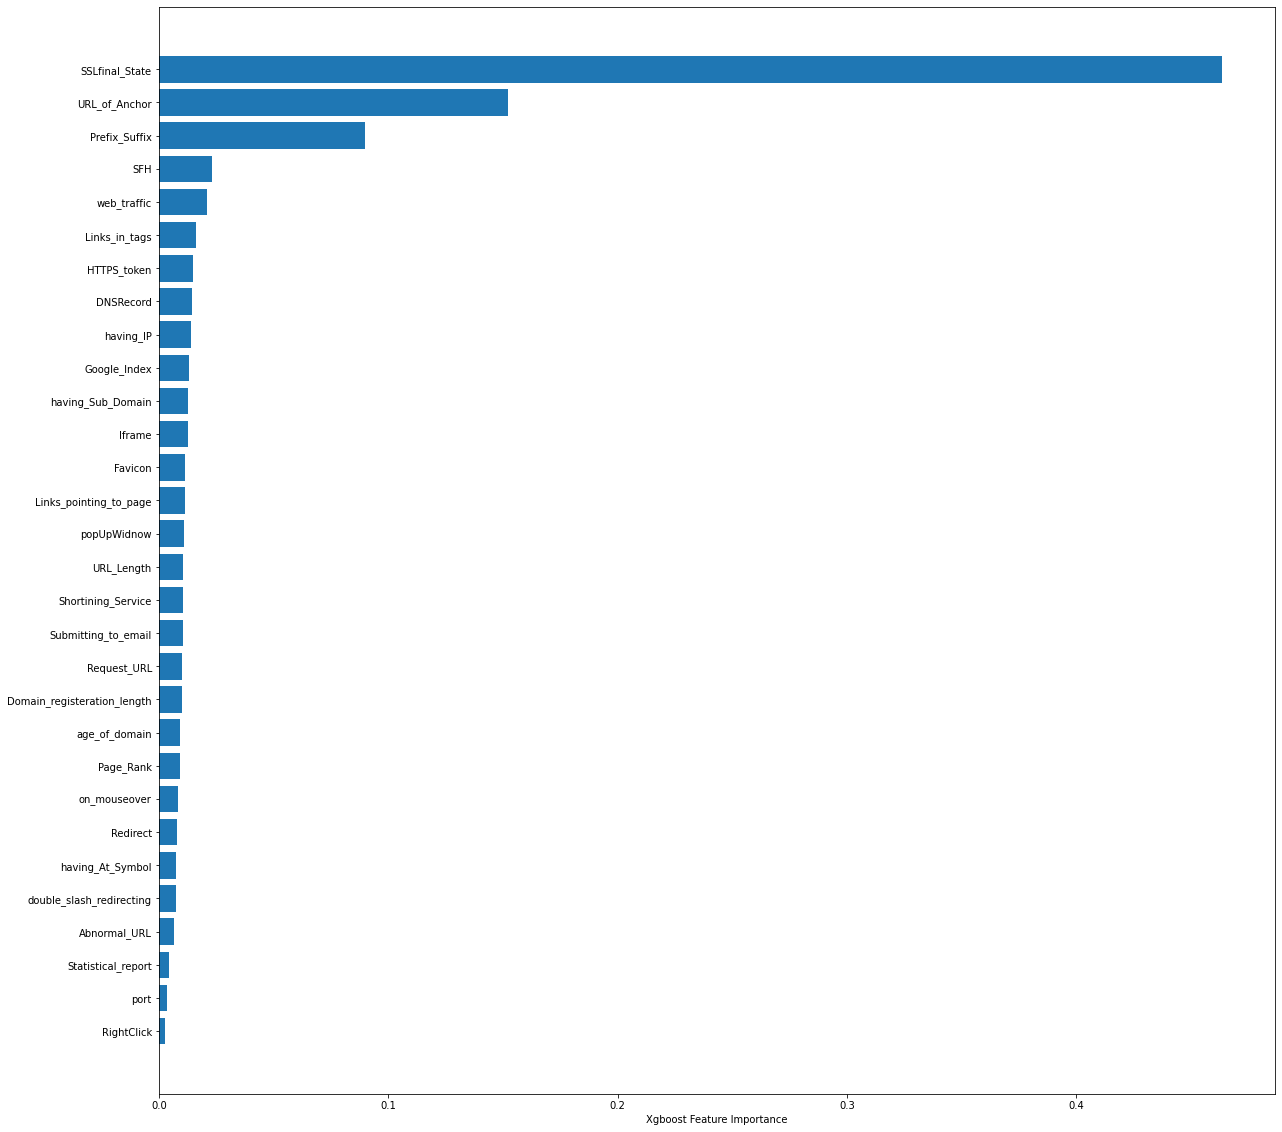

In [18]:
# visualizing the importance of features after training the model
sorted_idx = xgb.feature_importances_.argsort()
plt.figure(figsize=(20, 20))
plt.barh(features[sorted_idx], xgb.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")
plt.show()

#### Submission

In [19]:
# getting the key column from the testing dataset
key = test['key']

In [20]:
# dropping the key column from the testing dataset as we don't need that while predicting
test = test.drop(['key'],axis=1)

In [21]:
# predicting the test data
fpreds = xgb.predict(test)

In [22]:
# creating a dataframe with the key and the predicted values
xg_final_preds = pd.DataFrame(fpreds)

In [23]:
submission_preds_xg = pd.concat([key, xg_final_preds], axis=1)

In [24]:
# naming the columns of the dataframe
submission_preds_xg.columns = ['key', 'Result']

In [25]:
# saving the dataframe as a csv file
submission_preds_xg.to_csv('submission_xgb.csv', index=False)